In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("D3.ipynb")

# Discussion Lab 3 (2 Points Possible)

In this week's workbook, you will implement the K-NN classification algorithm, as well as practice some data cleaning that will prepare you for the final project.

In [ ]:
# !!!IMPORTANT!!! uncomment if needed for module installation
# Please comment out when you submit to gradescope

# %pip install -q --force-reinstall git+https://github.com/COGS118A/quiz_module.git
# %pip install -q otter-grader

In [ ]:
# Setup for JupyterQuiz
from quiz import display_quiz, record_quiz, check_quiz_answer, show_chosen_option
from IPython.core.display import display, Javascript, HTML
from scipy.stats import mode
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import shutil
import os.path
import warnings
warnings.filterwarnings('ignore')

D3_path = "https://raw.githubusercontent.com/COGS118A/DiscussionLabExercises/main/D3/"

## Practice 1: Model Complexity v.s. Over/Under-fitting (0.2 pts)

In [ ]:
HTML(display_quiz(f"{D3_path}M.txt"))

In [ ]:
# show your choice
with open("record.txt", "a+") as r:
    pass
MCQ = ["M1", "M2"]
for q in MCQ:
    show_chosen_option(q)


## Practice 2: K-Nearest Neighbors Classification (1 pts)

Although k-Nearest Neighbors models are the "dumbest" machine learning classifiers, they can be highly accurate and valuable in the real world. With k-NN models, the model is the data itself; for a new data point you want to predict, you compute the similarity between that point and every point in your dataset. 

The predicted class for a test set example is the majority of k classes.


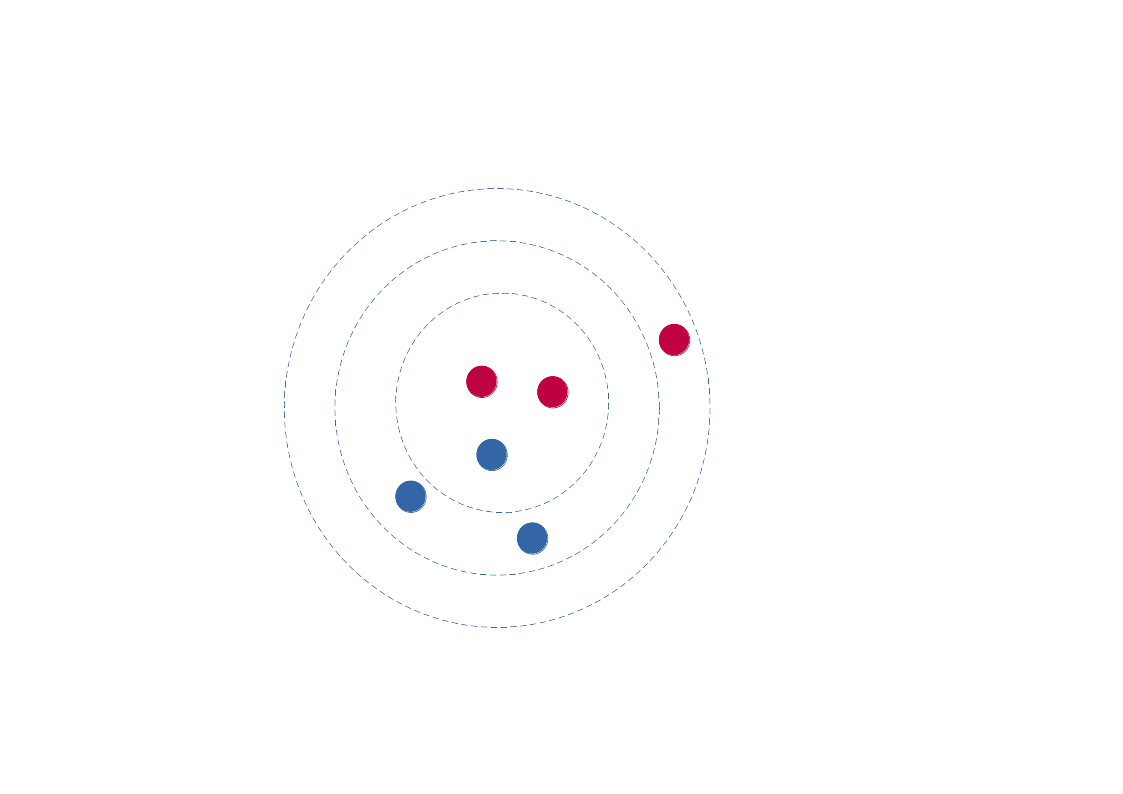

As you can imagine, with a large dataset, the model will perform exceptionally well. The downside is that the larger the dataset gets, the k-NN model will become more and more computationally complex: $O(1)$ training time (adding 1 data point to the model) and $O(n)$ testing time where $n$ equals the size of the dataset.


## Generating k-NN Data

This code generates clusters of data that you will build and test a k-NN model with.

In [ ]:
import numpy as np
np.random.seed(42)
# initialize two cluster center
mean1, cov1 = np.array([10,2]), np.array([[3,0],[5,3]]) 
mean2, cov2 = np.array([5,4]), np.array([[28,3],[3,20]]) 
# sampling from two cluster center
cluster_1 = np.random.multivariate_normal(mean1, cov2, 100) 
cluster_2 = np.random.multivariate_normal(mean1, cov2, 100) + 10
# randomly generate new test data from the parameter
test_data_1 = np.random.multivariate_normal(mean1, cov1, 20) 
test_data_2 = np.random.multivariate_normal(mean2, cov2, 20) + 10
test_data = np.random.multivariate_normal((mean1+mean2)/2, (cov1+cov2)/2, 100) + 5

## Visualizing the Training Data / k-NN Model

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(cluster_1[:,0], cluster_1[:,1], label="Positive Train")
plt.scatter(cluster_2[:,0], cluster_2[:,1], label="Negative Train", c='r')
plt.ylabel("X2")
plt.title("k-NN Training Data")
plt.legend()
plt.show()

## Visualizing the Test Set

The test data needs to be classified into positive and negative classes with your k-NN model.

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(cluster_1[:,0], cluster_1[:,1], label="Positive Class")
plt.scatter(cluster_2[:,0], cluster_2[:,1], label="Negative Class", c='r')
plt.scatter(test_data_1[:,0], test_data_1[:,1], label="Positive Test", c='black')
plt.scatter(test_data_2[:,0], test_data_2[:,1], label="Negative Test", c='green')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("k-NN Testing Data")
plt.legend()
plt.show()

## Problem 1.1 (0.3 pts):

First implement a function that returns the Euclidean distance between 2 points. 

In [ ]:
def euc_distance(point_1, point_2):
    ...

In [ ]:
grader.check("euc_distance")

## Problem 1.2 (0.7 pts):

Implement the k-NN classification algorithm.

### Implementation Instructions:

- Create a k-NN model that can take `k` number of neighbors to select for majority voting, `x_train` data points that comprise the model (the red and blue points), and `y_train` class labels corresponding to `x_train`, as an argument
- Using the Euclidean distance $(x_1 - x_2)^2$, 
- Store the distance between each `x_test` data point and the training set into an array and sort it according to ascending order of their distances
    - _Hint:_ You might found `np.argsort` useful
- Select the first K elements
- Perform majority voting so that the class with maximum occurences will be assigned as the new class for that test data point.
- `return` a NumPy array of the labels generated with `x_test`


In [ ]:
def predict(k, x_train, y_train, x_test):
    """
    Function to calculate KNN
    """
    ...

In [ ]:
# Data Preparation
# Concatenate the X and y train of two clusters
X_train = np.vstack((cluster_1, cluster_2))
y_train = np.append(np.ones(len(cluster_1)),
                    np.zeros(len(cluster_2))
                   ).reshape(len(cluster_1) + len(cluster_2), 1)

x_test = np.vstack((test_data_1, test_data_2))
y_test = np.append(np.ones(len(test_data_1)), np.zeros(len(test_data_2))).reshape(len(test_data_1) + len(test_data_2), 1)

# Try to use those data to test your implementation

In [ ]:
grader.check("KNN-implementation")

## Practice 3: Data Cleaning (0.8 pts)

In this part of the discussion lab, we will practice basic data-cleaning skills to prepare you for the final project. The data we gather is frequently messy and cannot be directly fed into a machine learning algorithm. Therefore, data preprocessing and cleaning are essential to prepare your data modeling. Remember, an imperfect dataset will make your model yield bad results even with state-of-the-art algorithms. "Garbage in, garbage out."

In this part, we will look at one dataset from the `FiveThirtyEight` surveys about the preference of weather checking behavior.

Let's read the data.

In [ ]:
import numpy as np
import pandas as pd

weather = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/weather-check/weather-check.csv")

# Show the first five rows of data
weather.head()

### Problem 3.1: Column Name (0.1 pts)
You might be surprised about how messy and lengthy each column is. For instance, "If you had a smartwatch (like the soon-to-be-released Apple Watch), how likely or unlikely would you be to check the weather on that device?" is a complete sentence survey question. We need help interpreting the meaning of this long sentence as a feature. Therefore, the first data cleaning stage is usually renaming the column names.

Please change the column names of `weather` to the provided `feature_names.` Stored the result back to the `weather` data frame.

In [ ]:
# A short and consice summary of each feature name.
feature_names = ["RespondentID", "Check_daily", "Check_methods", "Website_app", "Check_on_watch", "Age",
           "Gender", "Income_household", "US_Region"]

...

In [ ]:
# take a look at the weather
weather.head()

### Question 3.2: Binarize Feature (0.2 pts)
The shortened and concise column feature names make the data frame look cleaner and easier to interpret. Even though we can understand those observations with no problem, the computer will have difficulty distinguishing between the meaning of `Yes` and `No`. 

Please change the `Yes` and `No` values of the `Check_daily` column into boolean values. Perform this data cleaning in place using `.apply`.

In [ ]:
...

In [ ]:
grader.check("binarize_feature")

In [ ]:
# take a look at the dataset
weather.head()

### Problem 3.3: One-hot-encoding (0.1 pts)
Then, let's look at our dataset's `Age` features. Familiarizing yourself with all possible categories within a given feature for categorical attributes is good practice. The `.unique()` method might be helpful here.

In [ ]:
weather["Age"].unique()

Did you notice anything strange? These points are string types instead of integers. String representations need to be converted into numerical representations for machine learning algorithms.

In [ ]:
HTML(display_quiz(f"{D3_path}one_hot.txt"))

In [ ]:
# show your choice
with open("record.txt", "a+") as r:
    pass
MCQ = ["one_hot_1"]
for q in MCQ:
    show_chosen_option(q)

### Problem 3.4: Binning Age Feature (0.2 pts)
Let's try an approach other than one-hot encoding. Since the age is represented by the interval (for example, for the category between 18-29), we could encode this interval using only the start age of the corresponding groups. For instance, the Age group `30 - 44` can be represented by `30`.

Please encode the age using the start age of each group. Please do the cleaning in place. 
1. Use `np.nan` to substitute the unknown value `-`.
2. Use the string split method to get out the first element of the interval
3. Convert the data type of the column into `np.float64`

_Hint:_ You might find the `pd.Series.str` methods helpful.

In [ ]:
...

In [ ]:
# take a look at the data
weather.head()

In [ ]:
grader.check("binning-age-feature")

### Problem 3.5: Encode Income Feature (0.2 pts)
Encode the feature `Income_household` the same way. Pick the beginning interval as the desired value. Take care of the comma within the string.

1. Use `np.nan` to substitute the unknown value `Prefer not to answer` or `-`.
2. Convert the data type of the column into `np.float64`
3. Save the transformed column to the original column: `Income_household`

In [ ]:
...

In [ ]:
grader.check("encode_income_feature")

# Submission Guidelines
Congratulations! You have completed this discussion lab.

Have a look back over your answers, and also make sure to `Restart & Run All` from the kernel menu to double check that everything is working properly. This restarts everything and runs your code from top to bottom.

When you are ready to submit your assignment, you can click `Validate` at the top. Note that in some assignments the code will take too long to run and validation may fail. Validation is just a final check that all the asserts are passing without failing.

Once you're happy with your work, click the disk icon to save, and submit the zip file onto gradescope. **You MUST submit all the required component to receive credit.**

Note that you can submit at any time, but **we grade your most recent submission**. This means that **if you submit an updated notebook after the submission deadline, it will be marked as late**.

In [ ]:
# Make sure you have complete all the questions
MCQ = ["M1", "M2", "one_hot_1"]
for q in MCQ:
    show_chosen_option(q)

In [ ]:
grader.check("check_quiz_submission")

In [ ]:
%%javascript
IPython.notebook.save_notebook()

In [ ]:
export = True

if export:
    shutil.make_archive("D3", 'zip', ".")
    print("Export Successful! You can now submit to Gradescope")